In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


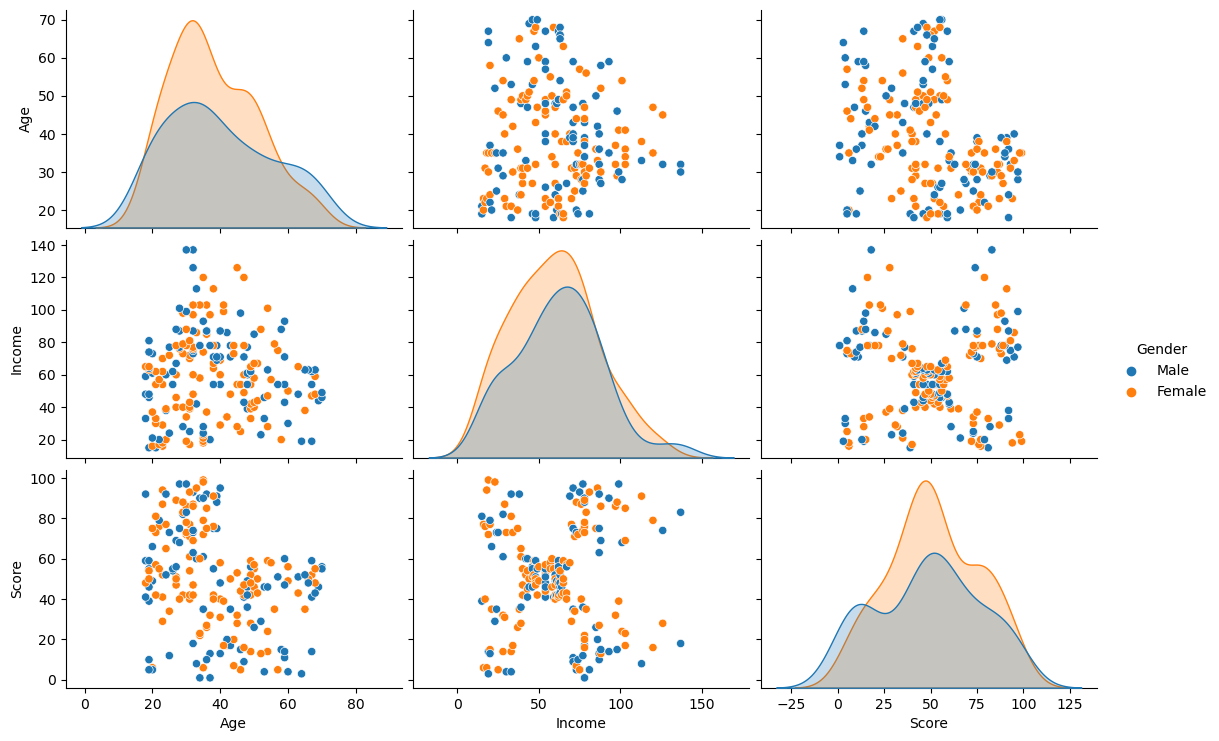

In [3]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (160, 3)
Testing set shape: (40, 3)


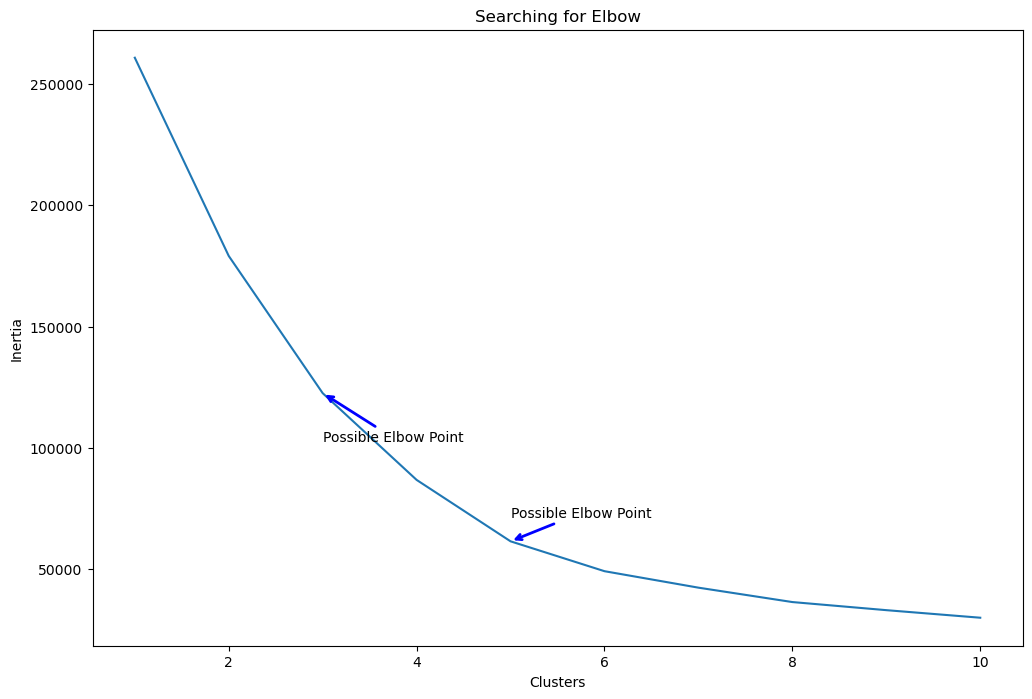

In [5]:
from sklearn.cluster import KMeans
# Perform the elbow method to find the optimal number of clusters
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_train)
    clusters.append(km.inertia_)
    
# Plot the elbow method
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, clusters[2]), xytext=(3, clusters[2] - 20000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, clusters[4]), xytext=(5, clusters[4] + 10000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

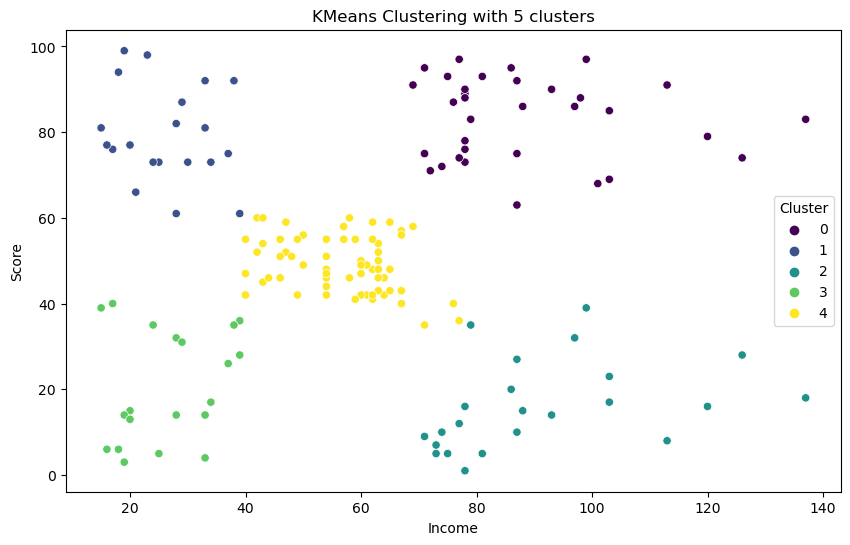

In [6]:
# Perform KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=X_train, palette='viridis')
plt.title('KMeans Clustering with 5 clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

# Assuming X_train and kmeans are defined from the previous code
# X_train['Cluster'] contains the cluster labels assigned by KMeans

# Calculate silhouette score
silhouette_avg_kmean = silhouette_score(X_train[['Income', 'Score']], X_train['Cluster'])

print(f"The silhouette score for the KMeans clustering model is: {silhouette_avg_kmean}")


The silhouette score for the KMeans clustering model is: 0.5479506928707178


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
X_test['Cluster'] = kmeans.fit_predict(X_test)
from sklearn.metrics import silhouette_score

# Assuming X_test and kmeans are defined from the previous code
# X_test['Cluster'] contains the cluster labels assigned by KMeans

# Calculate silhouette score for the test dataset
silhouette_avg_test = silhouette_score(X_test[['Income', 'Score']], X_test['Cluster'])

print(f"The silhouette score for the KMeans clustering model on the test dataset is: {silhouette_avg_test}")


The silhouette score for the KMeans clustering model on the test dataset is: 0.3092247909853363


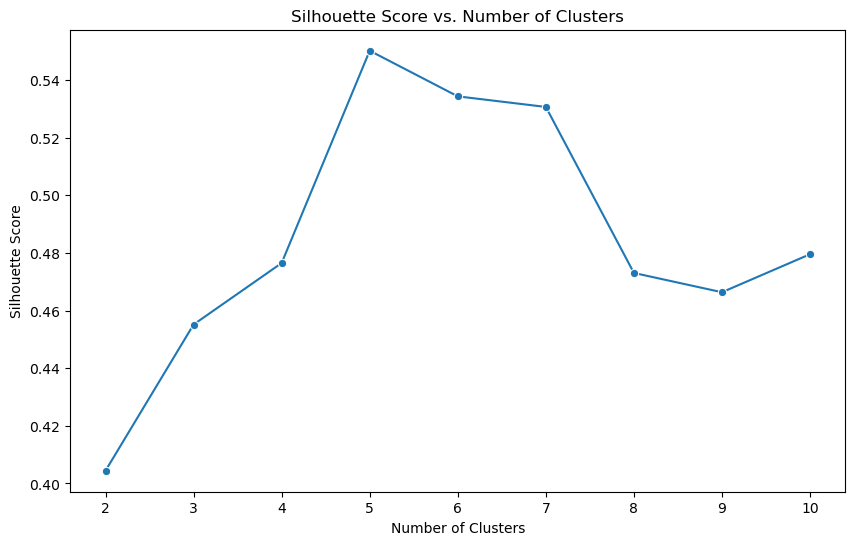

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is the training data and X_test is the test data
# X_train['Cluster'] contains the cluster labels assigned by KMeans

# Define the range of cluster numbers you want to try
cluster_range = range(2, 11)  # Trying clusters from 2 to 10

# Store silhouette scores for each cluster number
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    X_train['Cluster'] = kmeans.fit_predict(X_train[['Income', 'Score']])
    
    # Calculate silhouette score for the training dataset
    silhouette_avg = silhouette_score(X_train[['Income', 'Score']], X_train['Cluster'])
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=cluster_range, y=silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


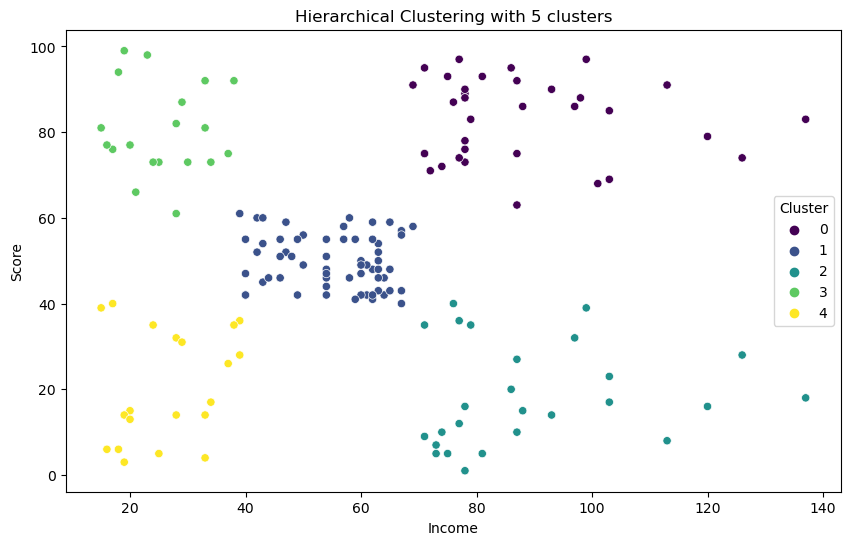

In [10]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5

# Use hierarchical clustering (AgglomerativeClustering)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
X_train['Cluster'] = hierarchical.fit_predict(X_train[['Income', 'Score']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=X_train, palette='viridis')
plt.title('Hierarchical Clustering with 5 clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()


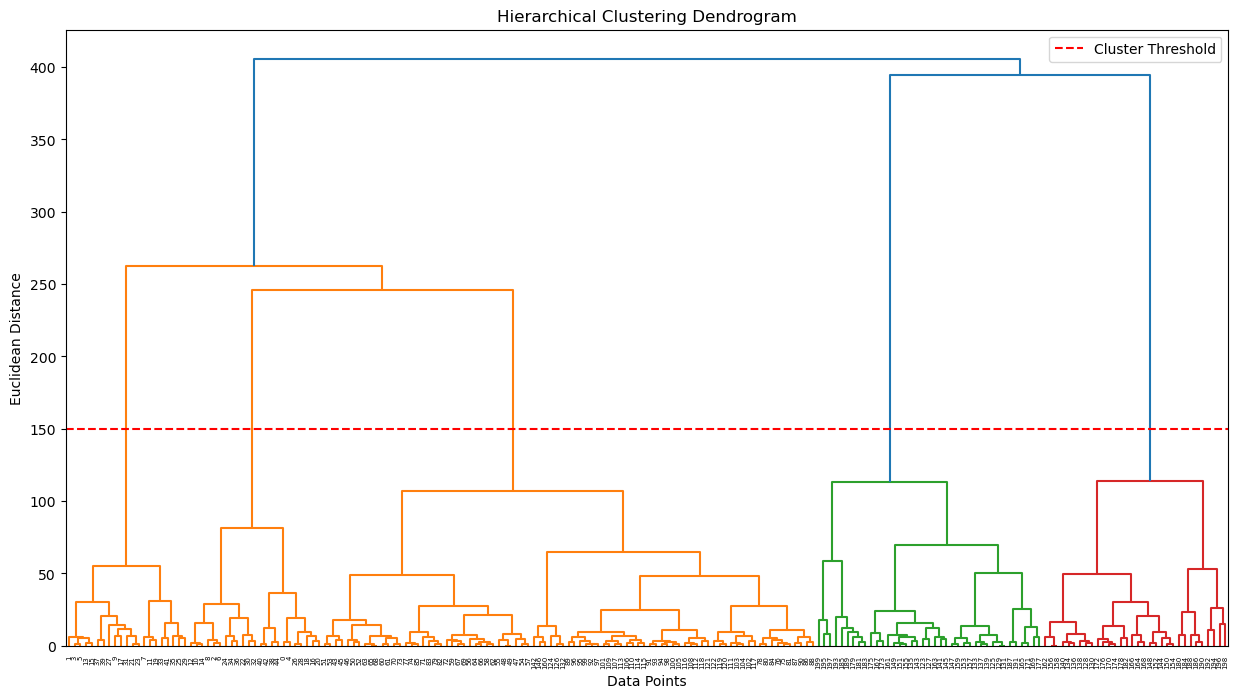

The number of clusters determined by the dendrogram is: 5


In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
# Construct a dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X[['Income', 'Score']], method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
# plt.show()
# Add a horizontal line to determine the number of clusters
threshold_distance = 150  # Adjust this value based on your interpretation
plt.axhline(y=threshold_distance, color='r', linestyle='--', label='Cluster Threshold')
linkage_matrix = linkage(X[['Income', 'Score']], method='ward')
plt.legend()
plt.show()

# Determine the number of clusters based on the threshold_distance
clusters = fcluster(linkage_matrix, threshold_distance, criterion='distance')
num_clusters = len(set(clusters))

print(f"The number of clusters determined by the dendrogram is: {num_clusters}")

In [12]:
from sklearn.metrics import silhouette_score

# Assuming X_train and kmeans are defined from the previous code
# X_train['Cluster'] contains the cluster labels assigned by KMeans

# Calculate silhouette score
silhouette_avg_agglom = silhouette_score(X_train[['Income', 'Score']], X_train['Cluster'])

print(f"The silhouette score for the Agglomerative Clustering model is: {silhouette_avg_agglom}")

The silhouette score for the Agglomerative Clustering model is: 0.5446226502499154


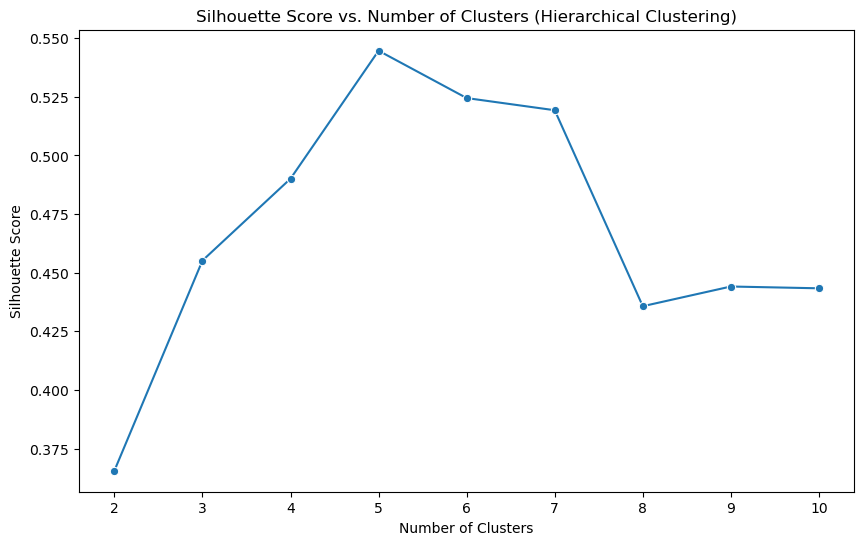

In [13]:
from sklearn.cluster import AgglomerativeClustering
# Define the range of cluster numbers you want to try
cluster_range = range(2, 11)  # Trying clusters from 2 to 10

# Store silhouette scores for each cluster number
silhouette_scores = []

for num_clusters in cluster_range:
    # Use hierarchical clustering (AgglomerativeClustering)
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    X_train['Cluster'] = hierarchical.fit_predict(X_train[['Income', 'Score']])
    
    # Calculate silhouette score for the training dataset
    silhouette_avg = silhouette_score(X_train[['Income', 'Score']], X_train['Cluster'])
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=cluster_range, y=silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

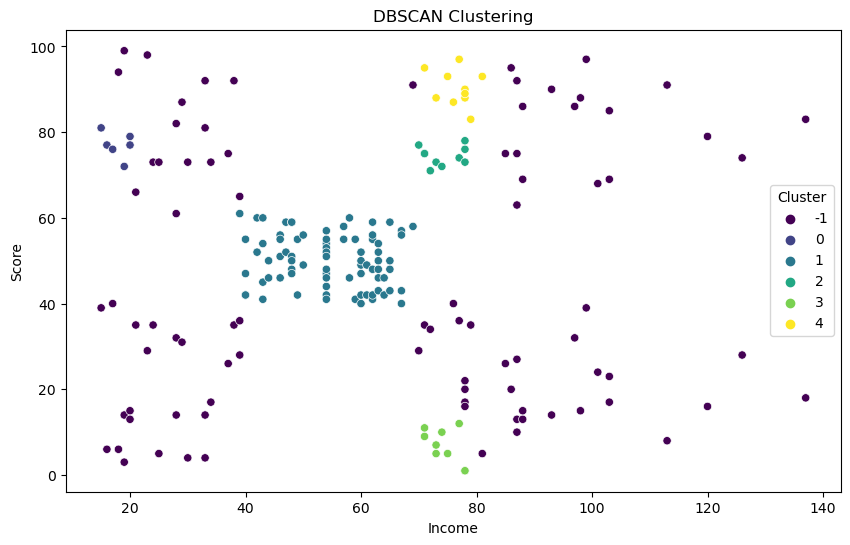

In [14]:
from sklearn.cluster import DBSCAN
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)  # Adjust eps and min_samples based on your data
X['Cluster'] = dbscan.fit_predict(X[['Income', 'Score']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=X, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

# Assuming X_train and kmeans are defined from the previous code
# X_train['Cluster'] contains the cluster labels assigned by KMeans

# Calculate silhouette score
silhouette_avg_hierar = silhouette_score(X_train[['Income', 'Score']], X_train['Cluster'])

print(f"The silhouette score for the Hierarchical clustering model is: {silhouette_avg_hierar}")


The silhouette score for the Hierarchical clustering model is: 0.4433341849614276


In [16]:
# # Define the range of min_samples values you want to try
# min_samples_values = [5, 10, 15]  # Adjust based on your data

# # Store silhouette scores for each min_samples value
# silhouette_scores = []

# for min_samples in min_samples_values:
#     # Try different values of eps within a reasonable range
#     eps_values = np.linspace(0.5, 2.5, 10)
    
#     # Store silhouette scores for each combination of eps and min_samples
#     scores_for_min_samples = []
    
#     for eps in eps_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         X['Cluster'] = dbscan.fit_predict(X[['Income', 'Score']])
        
#         # Check if there are at least two unique labels
#         unique_labels = np.unique(X['Cluster'])
#         if len(unique_labels) > 1:
#             # Calculate silhouette score for the dataset
#             silhouette_avg = silhouette_score(X[['Income', 'Score']], X['Cluster'])
#             scores_for_min_samples.append(silhouette_avg)
    
#     # Store the average silhouette score for the current min_samples value
#     avg_score = np.mean(scores_for_min_samples)
#     silhouette_scores.append((min_samples, avg_score))

# # Plot the silhouette scores
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=[item[0] for item in silhouette_scores], y=[item[1] for item in silhouette_scores], marker='o')
# plt.title('Silhouette Score vs. Min Samples (DBSCAN)')
# plt.xlabel('Min Samples')
# plt.ylabel('Average Silhouette Score')
# plt.show()

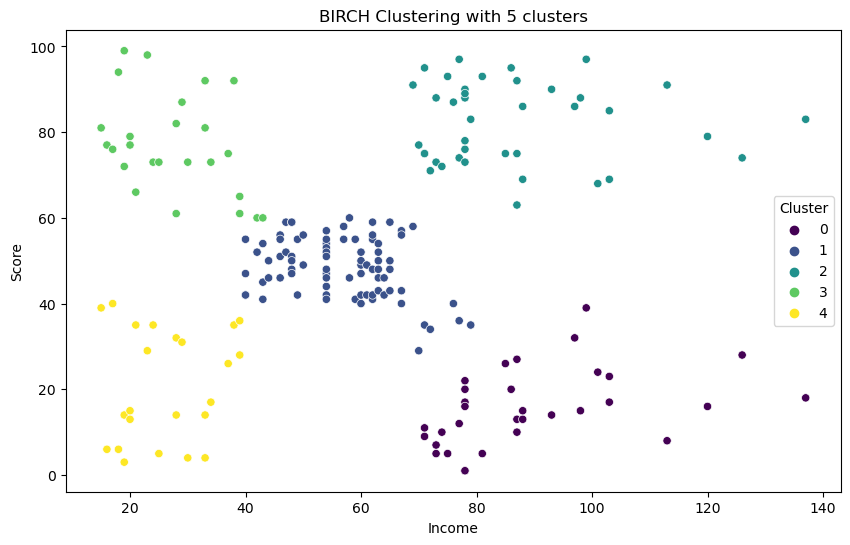

In [17]:
from sklearn.cluster import Birch
# Perform BIRCH clustering
birch = Birch(n_clusters=5)
X['Cluster'] = birch.fit_predict(X[['Income', 'Score']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=X, palette='viridis')
plt.title('BIRCH Clustering with 5 clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [18]:
# Perform BIRCH clustering
birch = Birch(n_clusters=5)
X['Cluster'] = birch.fit_predict(X[['Income', 'Score']])

# Calculate silhouette score for the dataset
silhouette_avg_birch = silhouette_score(X[['Income', 'Score']], X['Cluster'])
print(f"The silhouette score for BIRCH clustering is: {silhouette_avg_birch}")

The silhouette score for BIRCH clustering is: 0.5419687641328385


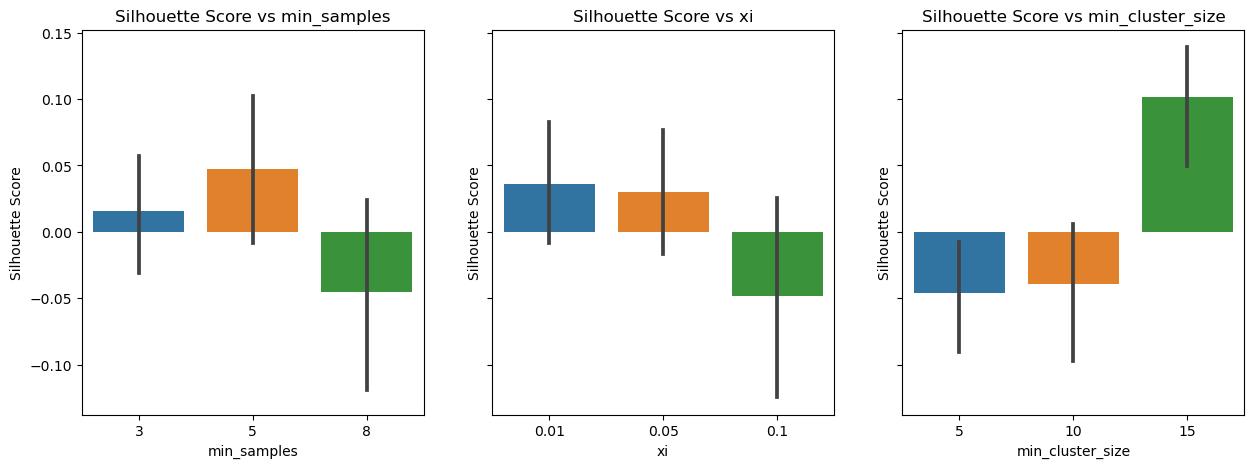

In [21]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import OPTICS
# Define parameter grid for grid search
param_grid = {
    'min_samples': [3, 5, 8],
    'xi': [0.01, 0.05, 0.1],
    'min_cluster_size': [5, 10, 15]
}

# Store results
results = []

# Perform grid search
for params in ParameterGrid(param_grid):
    optics = OPTICS(**params)
    X['Cluster'] = optics.fit_predict(X[['Income', 'Score']])
    
    # Calculate silhouette score for the dataset
    silhouette_avg = silhouette_score(X[['Income', 'Score']], X['Cluster'])
    
    results.append({
        'min_samples': params['min_samples'],
        'xi': params['xi'],
        'min_cluster_size': params['min_cluster_size'],
        'silhouette_score': silhouette_avg
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the silhouette scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, param_name in enumerate(['min_samples', 'xi', 'min_cluster_size']):
    sns.barplot(x=param_name, y='silhouette_score', data=results_df, ax=axes[i])
    axes[i].set_title(f'Silhouette Score vs {param_name}')
    axes[i].set_xlabel(param_name)
    axes[i].set_ylabel('Silhouette Score')

plt.show()

In [22]:
# Find the best parameters
best_result = results_df.loc[results_df['silhouette_score'].idxmax()]

print("Best Parameters:")
print(f"min_samples: {best_result['min_samples']}")
print(f"xi: {best_result['xi']}")
print(f"min_cluster_size: {best_result['min_cluster_size']}")
print(f"Silhouette Score: {best_result['silhouette_score']}")


Best Parameters:
min_samples: 5.0
xi: 0.01
min_cluster_size: 15.0
Silhouette Score: 0.17198219347273522


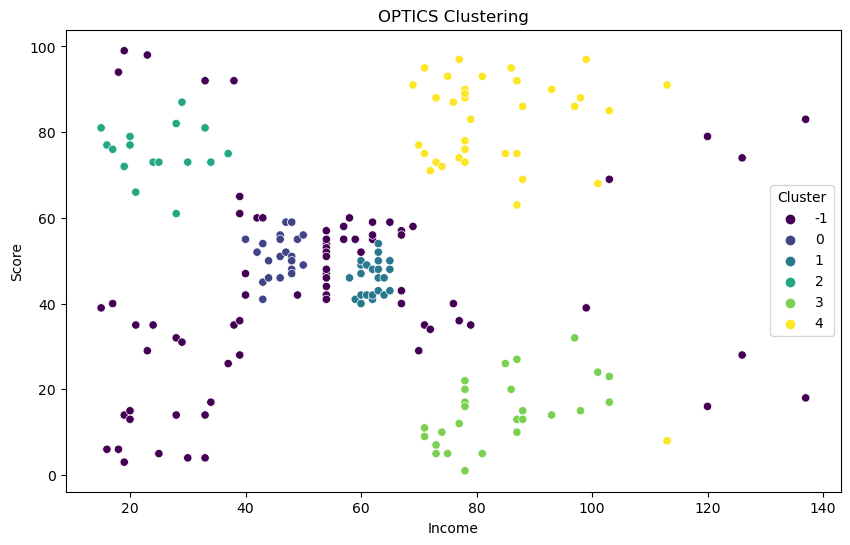

In [23]:

# Perform OPTICS clustering
optics = OPTICS(min_samples=5, xi=0.01, min_cluster_size=15)  # Adjust parameters based on your data
X['Cluster'] = optics.fit_predict(X[['Income', 'Score']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=X, palette='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [24]:
# Perform OPTICS clustering
optics = OPTICS(min_samples=5, xi=0.01, min_cluster_size=15)  # Adjust parameters based on your data
X['Cluster'] = optics.fit_predict(X[['Income', 'Score']])

# Calculate silhouette score for the dataset
silhouette_avg_optics = silhouette_score(X[['Income', 'Score']], X['Cluster'])
print(f"The silhouette score for OPTICS clustering is: {silhouette_avg_optics}")


The silhouette score for OPTICS clustering is: 0.17198219347273522


In [25]:
print(f"The silhouette score for the KMeans clustering model is: {silhouette_avg_kmean}")
print(f"The silhouette score for the Hierarchical clustering model is: {silhouette_avg_agglom}")
print(f"The silhouette score for the Agglomerative clustering model is: {silhouette_avg_hierar}")
print(f"The silhouette score for BIRCH clustering is: {silhouette_avg_birch}")
print(f"The silhouette score for OPTICS clustering is: {silhouette_avg_optics}")

The silhouette score for the KMeans clustering model is: 0.5479506928707178
The silhouette score for the Hierarchical clustering model is: 0.5446226502499154
The silhouette score for the Agglomerative clustering model is: 0.4433341849614276
The silhouette score for BIRCH clustering is: 0.5419687641328385
The silhouette score for OPTICS clustering is: 0.17198219347273522


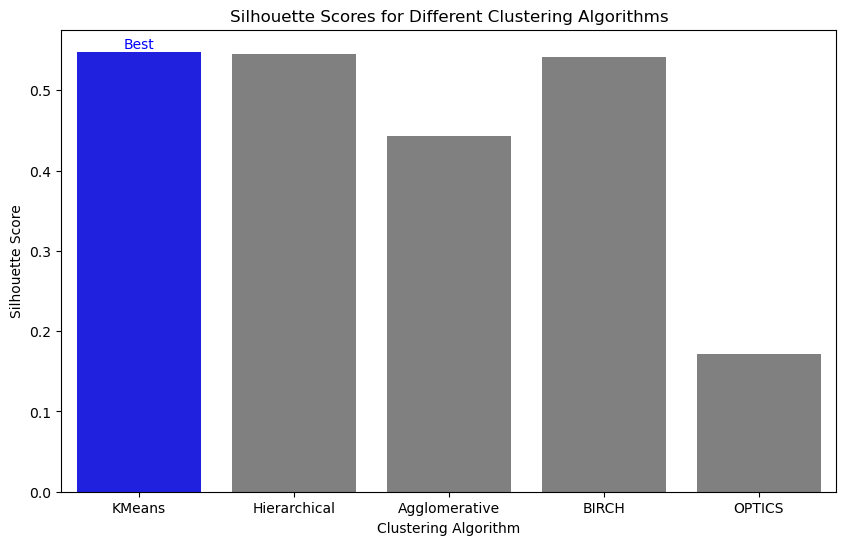

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have calculated silhouette scores for each algorithm
silhouette_scores = [silhouette_avg_kmean, silhouette_avg_agglom, silhouette_avg_hierar, silhouette_avg_birch, silhouette_avg_optics]
algorithm_names = ['KMeans', 'Hierarchical', 'Agglomerative', 'BIRCH', 'OPTICS']

# Find the index of the algorithm with the highest silhouette score
best_algorithm_index = silhouette_scores.index(max(silhouette_scores))

# Create a color list with a distinctive color for the best-performing algorithm
colors = ['grey' if i != best_algorithm_index else 'blue' for i in range(len(algorithm_names))]

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithm_names, y=silhouette_scores, palette=colors)
plt.title('Silhouette Scores for Different Clustering Algorithms')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')

# Annotate the bar with the highest silhouette score
plt.text(best_algorithm_index, max(silhouette_scores), f'Best', ha='center', va='bottom', color='blue')

plt.show()
